# Diagnostics on full cat

Here we will look at the full SXDS catalogue.

In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA = '/Volumes/Raph500/lsst-ir-fusion/dmu5/dmu5_SXDS/data'

In [3]:
cat = Table.read(DATA+'/full_reduced_cat_SXDS.fits')[
    'id', 
    'VISTA-Ks_m_coord_ra', 
    'VISTA-Ks_m_coord_dec',
    'VISTA-Ks_m_detect_isPatchInner',
    'VISTA-Ks_m_detect_isTractInner',
    'HSC-G_m_base_CircularApertureFlux_6_0_mag',
    'HSC-G_m_base_CircularApertureFlux_6_0_magErr',
    'HSC-G_m_base_CircularApertureFlux_9_0_mag',
    'HSC-G_m_base_CircularApertureFlux_9_0_magErr',
    'HSC-G_m_base_CircularApertureFlux_12_0_mag',
    'HSC-G_m_base_CircularApertureFlux_12_0_magErr',
    'HSC-G_m_base_CircularApertureFlux_17_0_mag',
    'HSC-G_m_base_CircularApertureFlux_17_0_magErr',
    'HSC-R_m_base_CircularApertureFlux_6_0_mag',
    'HSC-R_m_base_CircularApertureFlux_6_0_magErr',
    'HSC-R_m_base_CircularApertureFlux_9_0_mag',
    'HSC-R_m_base_CircularApertureFlux_9_0_magErr',
    'HSC-R_m_base_CircularApertureFlux_12_0_mag',
    'HSC-R_m_base_CircularApertureFlux_12_0_magErr',
    'HSC-R_m_base_CircularApertureFlux_17_0_mag',
    'HSC-R_m_base_CircularApertureFlux_17_0_magErr'
]

In [4]:
len(cat)

1533774

In [6]:
!mkdir figs

mkdir: figs: File exists


In [8]:
apDiff = cat['HSC-G_m_base_CircularApertureFlux_9_0_mag'] - cat['HSC-G_m_base_CircularApertureFlux_6_0_mag']
m = apDiff > -0.75
m &= apDiff < 0

In [9]:
np.sum(m)

909575

/Users/rs548/GitHub/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rs548/GitHub/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'HSC-G 9pix - 6pix aperture [mag]')

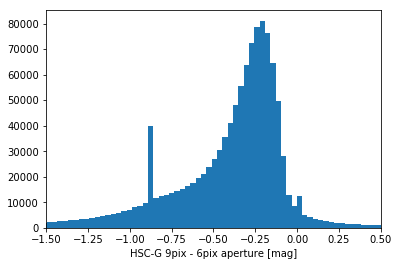

In [10]:
plt.hist(apDiff,bins=1000)
plt.xlim([-1.5,0.5])
plt.xlabel('HSC-G 9pix - 6pix aperture [mag]')

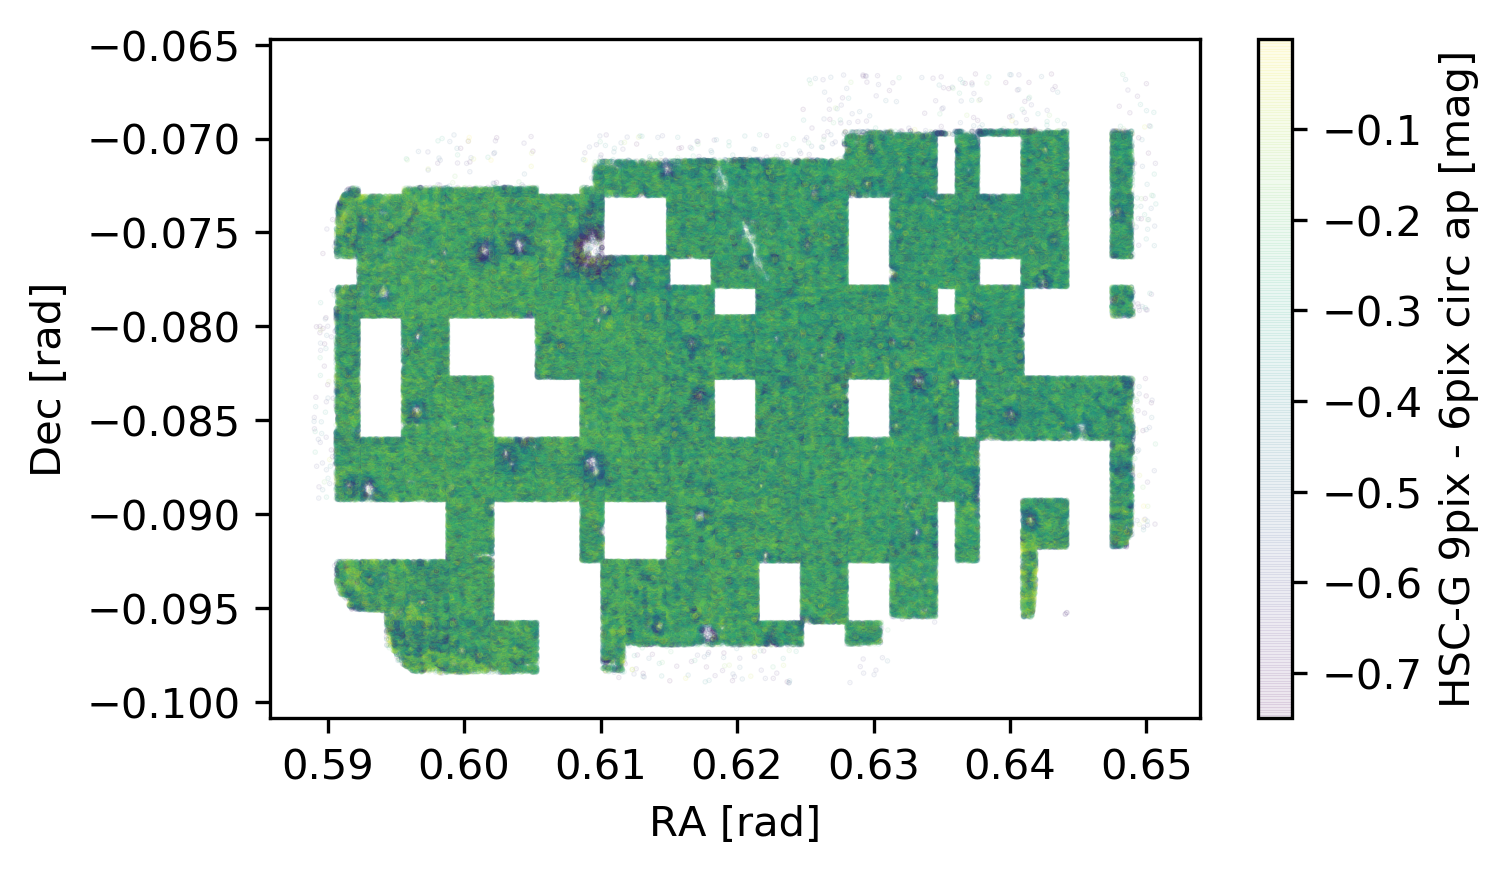

In [11]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)

im = ax.scatter(
    cat[m]['VISTA-Ks_m_coord_ra'],cat[m]['VISTA-Ks_m_coord_dec'],
    c=apDiff[m],
    s=0.1,alpha=0.1, rasterized=True)
fig.colorbar(im, ax=ax).set_label('HSC-G 9pix - 6pix circ ap [mag]')
ax.set_xlabel('RA [rad]')
ax.set_ylabel('Dec [rad]')
fig.savefig('./figs/apDiff_9-6_HSC-G.pdf', bbox_inches='tight')
fig.savefig('./figs/apDiff_9-6_HSC-G.png', bbox_inches='tight')

In [12]:
np.array([6,9,12,17])*0.168

array([1.008, 1.512, 2.016, 2.856])

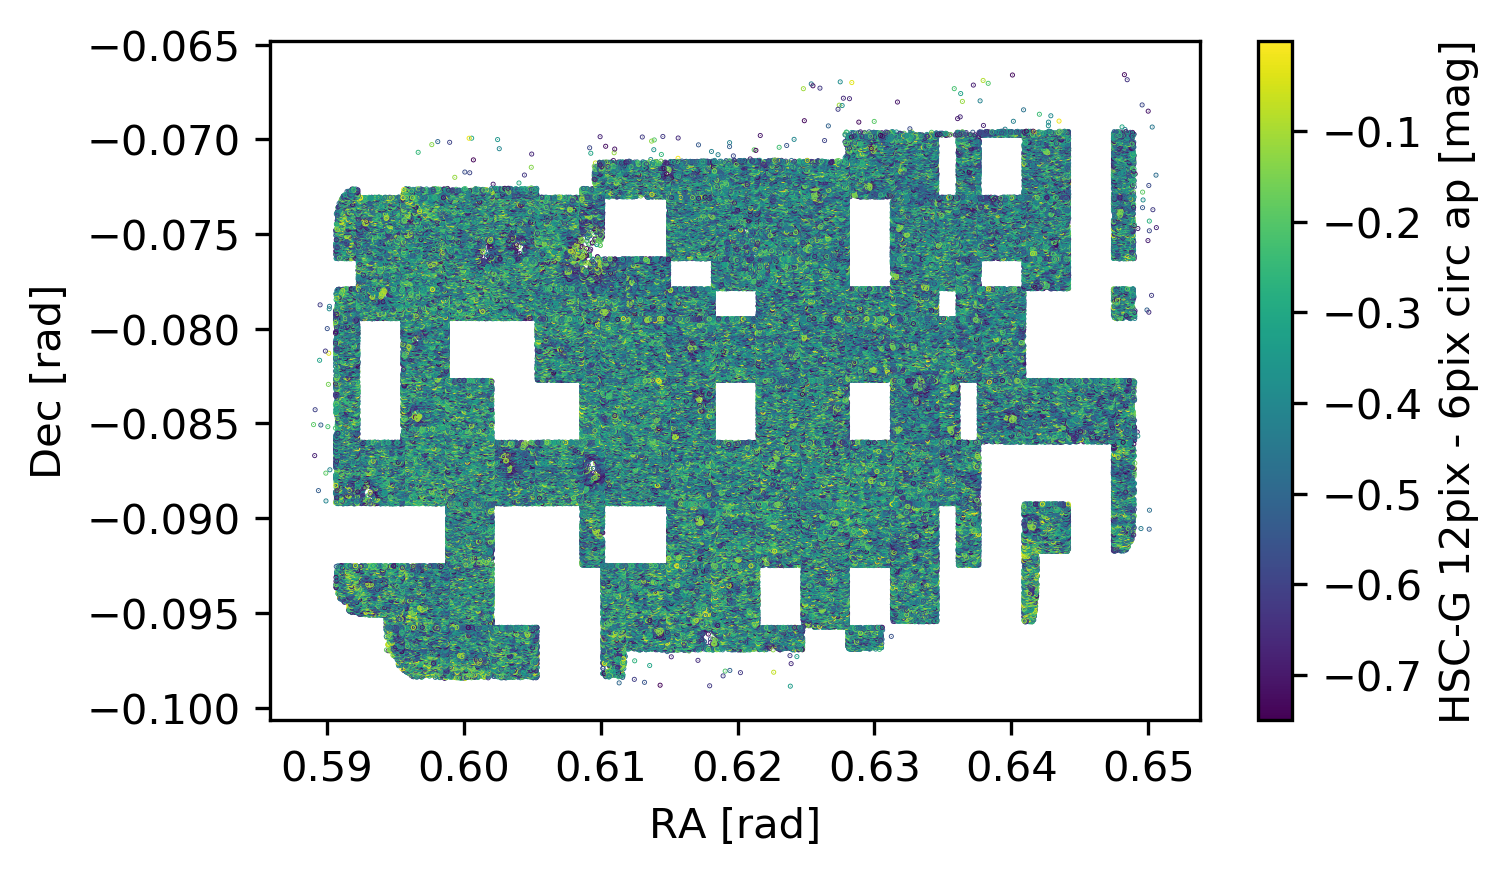

In [20]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
apDiff = cat['HSC-G_m_base_CircularApertureFlux_12_0_mag'] - cat['HSC-G_m_base_CircularApertureFlux_6_0_mag']
m = apDiff > -0.75
m &= apDiff < 0
im = ax.scatter(cat[m]['VISTA-Ks_m_coord_ra'],cat[m]['VISTA-Ks_m_coord_dec'],c=apDiff[m],
                s=0.05,alpha=1., rasterized=True)
fig.colorbar(im, ax=ax).set_label('HSC-G 12pix - 6pix circ ap [mag]')
ax.set_xlabel('RA [rad]')
ax.set_ylabel('Dec [rad]')
fig.savefig('./figs/apDiff_12-6_HSC-G.pdf', bbox_inches='tight')
fig.savefig('./figs/apDiff_12-6_HSC-G.png', bbox_inches='tight')

Text(0.5, 0, 'HSC-G 12pix - 6pix aperture [mag]')

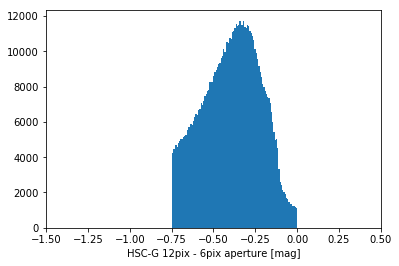

In [16]:
plt.hist(apDiff[m],bins=100)
plt.xlim([-1.5,0.5])
plt.xlabel('HSC-G 12pix - 6pix aperture [mag]')

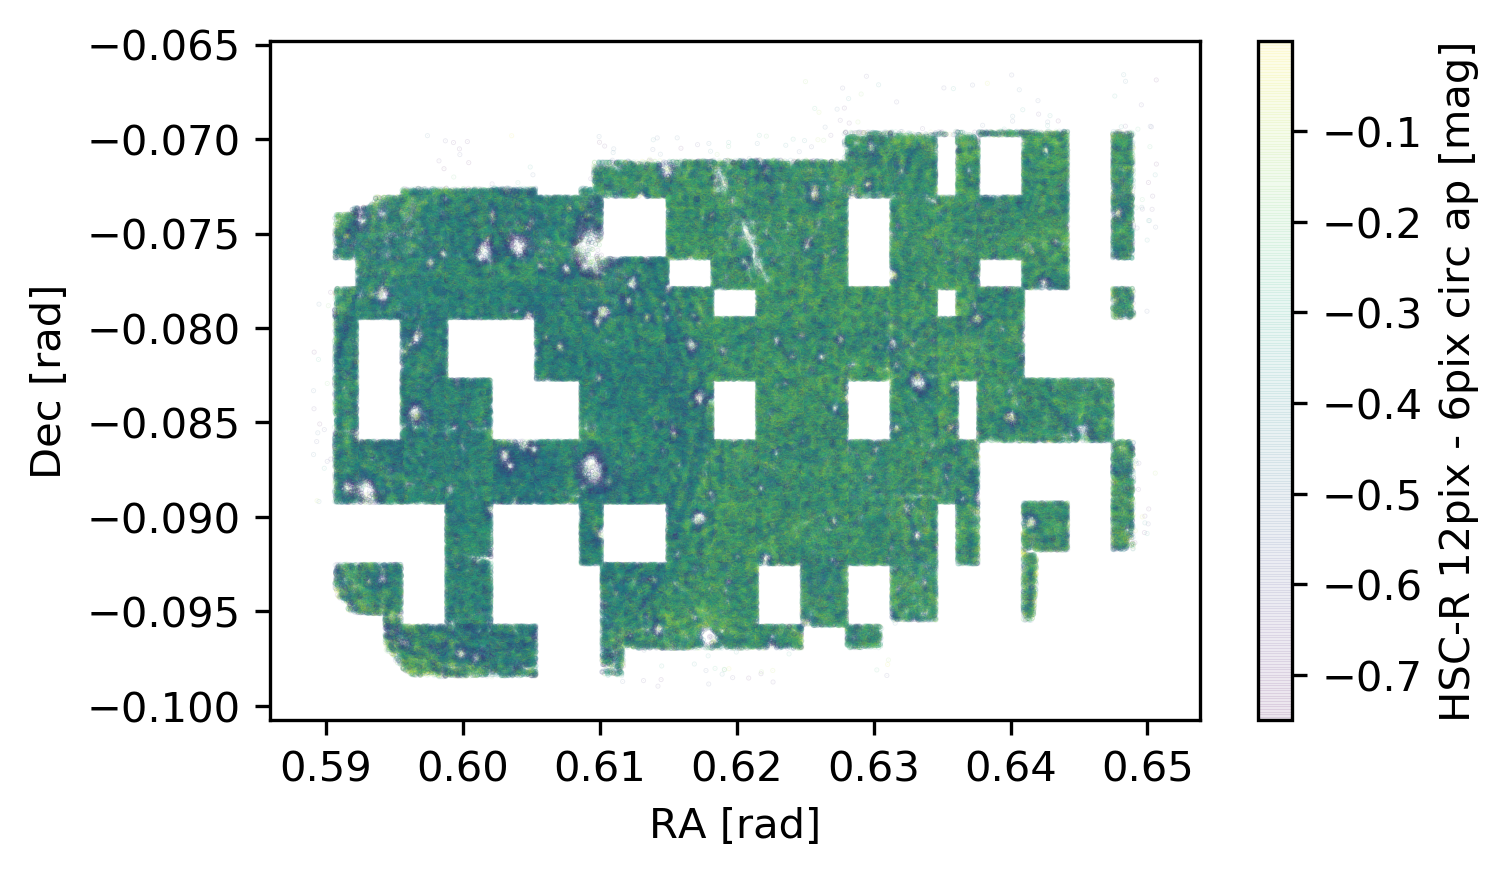

In [23]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
apDiff = cat['HSC-R_m_base_CircularApertureFlux_12_0_mag'] - cat['HSC-R_m_base_CircularApertureFlux_6_0_mag']
m = apDiff > -0.75
m &= apDiff < 0
im = ax.scatter(cat[m]['VISTA-Ks_m_coord_ra'],cat[m]['VISTA-Ks_m_coord_dec'],c=apDiff[m],
                s=0.05,alpha=0.1, rasterized=True)
fig.colorbar(im, ax=ax).set_label('HSC-R 12pix - 6pix circ ap [mag]')
ax.set_xlabel('RA [rad]')
ax.set_ylabel('Dec [rad]')
fig.savefig('./figs/apDiff_12-6_HSC-R.pdf', bbox_inches='tight')
fig.savefig('./figs/apDiff_12-6_HSC-R.png', bbox_inches='tight')

Text(0.5, 0, 'HSC-R 12pix - 6pix aperture [mag]')

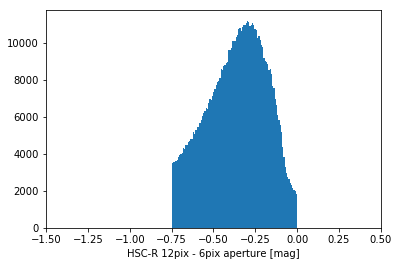

In [18]:
plt.hist(apDiff[m],bins=100)
plt.xlim([-1.5,0.5])
plt.xlabel('HSC-R 12pix - 6pix aperture [mag]')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
apDiff = cat['HSC-R_m_base_CircularApertureFlux_12_0_mag'] - cat['HSC-R_m_base_CircularApertureFlux_6_0_mag']
m = apDiff > -0.75
m &= apDiff < 0
im = ax.scatter(cat[m]['VISTA-Ks_m_coord_ra'],cat[m]['VISTA-Ks_m_coord_dec'],c=apDiff[m],
                s=0.1,alpha=0.1, rasterized=True)
fig.colorbar(im, ax=ax).set_label('HSC-G 12pix - 6pix circ ap [mag]')
ax.set_xlabel('RA [rad]')
ax.set_ylabel('Dec [rad]')
fig.savefig('./figs/apDiff_12-6_HSC-R.pdf', bbox_inches='tight')
fig.savefig('./figs/apDiff_12-6_HSC-R.png', bbox_inches='tight')